<h1 style="text-align: center; font-family: Arial, sans-serif; font-size: 36px; text-transform: uppercase; letter-spacing: 2px; background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.2);">
    Code </h1> 

# Global Energy Plants 

## Global power plants around the world dataset file
### Found at this website here 
### (https://resourcewatch.org/data/explore/Powerwatch?section=Discover&selectedCollection=&zoom=3&lat=0&lng=0&pitch=0&bearing=0&basemap=dark&labels=light&layers=%255B%257B%2522dataset%2522%253A%2522a86d906d-9862-4783-9e30-cdb68cd808b8%2522%252C%2522opacity%2522%253A1%252C%2522layer%2522%253A%25222a694289-fec9-4bfe-a6d2-56c3864ec349%2522%257D%255D&aoi=&page=1&sort=most-viewed&sortDirection=-1) 

### Imports

In [49]:
#Imports
import numpy as np
#to show the dataset
import pandas as pd


### Dataset in use 

In [50]:
sample_data = pd.read_csv('global_power_plant_database.csv')  # linking the dataset using pandas
sample_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


# Linear Regression 

### Imports

In [57]:
#Importing the needed libraries 

#Pandas for data manipulation
import pandas as pd
#Training and testing split import 
from sklearn.model_selection import train_test_split
#Regression model 
from sklearn.linear_model import LinearRegression
#Metric to evualte performance 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#Plot visuals 
import matplotlib.pyplot as plt
import seaborn as sns 

### Reading the file

In [58]:
#Loading the file for usage 
file = "global_power_plant_database.csv"  
data = pd.read_csv(file)

In [59]:
#Reshaping the data for the analysis 
#generation coulmns that represent electricity generation from 2013 to 2016 
generation_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']

#Removes all rows where data is missing (dropna) and transform data into long format 
longformat_data = pd.melt(data.dropna(subset=generation_columns, how="all"), id_vars=["capacity_mw", "fuel1", "commissioning_year"], 
value_vars=generation_columns, var_name="year", value_name="generation_gwh").dropna()

#Converting the year column into numeric years 
longformat_data["year"] = longformat_data["year"].str.extract(r"(\d{4})").astype(int)
format_data = pd.get_dummies(longformat_data, columns=["fuel1"], drop_first=True)


### Assigning values top X, y and splitting them into training and testing

In [60]:
# X value includes year and capacity 
X = longformat_data[["year", "capacity_mw", "commissioning_year"] + [col for col in longformat_data if col.startswith("fuel1_")]]

# y value includes electricity generation gwh 
y = longformat_data["generation_gwh"]

#Splitting the data into 20% for tests and 80% for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predicting target variable and showcasing the performance metric 

In [62]:
#Activating the linear regression import 
model = LinearRegression().fit(X_train, y_train)

#Predicts target variable 
y_pred = model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Displaying the metrics
print("Performance of Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Performance of Linear Regression Model:
Mean Squared Error (MSE): 1348551.1902730654
Root Mean Squared Error (RMSE): 1161.2713680587606
Mean Absolute Error (MAE): 477.1848635551244
R-squared (R²): 0.7777282050969443


### Visual Representation 

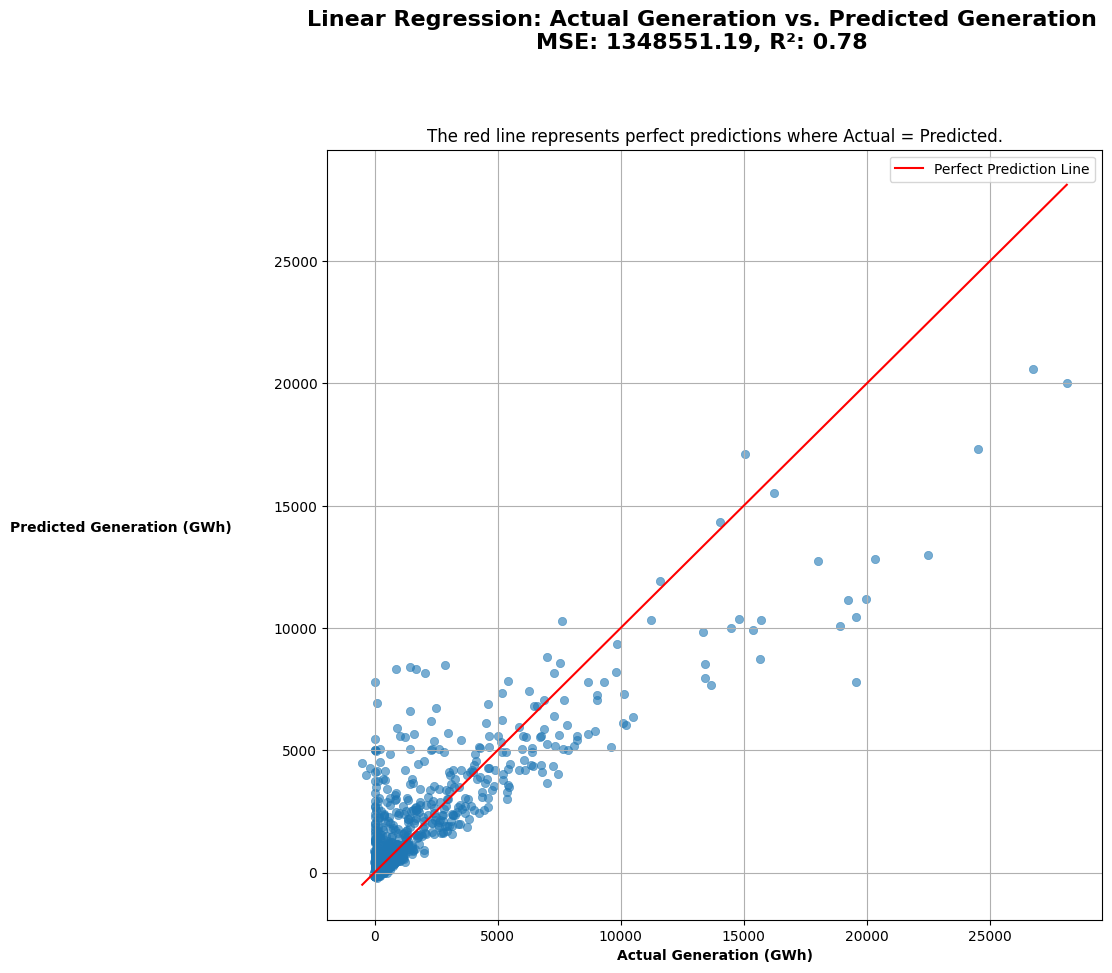

In [63]:
#Visual representation
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

#Plot 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-", label="Perfect Prediction Line")

#Title 
plt.suptitle(f"Linear Regression: Actual Generation vs. Predicted Generation\nMSE: {mse:.2f}, R²: {r2:.2f}", fontsize=16, fontweight='bold', y=1.02)

# Subtitle (placed just below the main title)
plt.title("The red line represents perfect predictions where Actual = Predicted.")

# Axis labels
plt.xlabel('Actual Generation (GWh)', fontweight='bold')
plt.ylabel('Predicted Generation (GWh)', rotation=0, labelpad=30, ha='right', fontweight='bold')

#Show legend and grid
plt.legend()
plt.grid(True)
plt.show()


# Nuclear Energy 

## Nuclear Energy in the US dataset 

### Found at this website here (https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets)

### Imports 

In [37]:
#Imports
import numpy as np
#to show the dataset
import pandas as pd
#to use visual plots 
import matplotlib.pyplot as plt 
#Import for splitting and testing data
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Dataset in use 

In [38]:
sample_data = pd.read_csv('nuclear_energy_overview_eia.csv')  # linking the dataset using pandas
sample_data.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,Not Available,14.533,6246,3.9,57.8
1,1973,February,Not Available,14.533,5928,4.1,60.7
2,1973,March,Not Available,15.314,6649,4.5,58.4
3,1973,April,Not Available,15.314,5876,4.2,53.4
4,1973,May,Not Available,16.174,5697,3.9,47.3


# K Nearest Neighbour 

In [39]:
# Check for missing values
print(sample_data.isnull().sum())

Year                                              0
Month                                             0
Nuclear Generating Units, Total Operable Units    0
Nuclear Generating Units, Net Summer Capacity     0
Nuclear Electricity Net Generation                0
Nuclear Share of Electricity Net Generation       0
Nuclear Generating Units, Capacity Factor         0
dtype: int64


In [40]:
# Drop rows with missing values
sample_data = sample_data.dropna()

# Drop rows where 'Month' is missing
sample_data = sample_data.dropna(subset=['Month'])

In [41]:
# Convert 'Month' to numerical values (1 for January, 2 for February, etc.)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'Month' column
sample_data['Month'] = sample_data['Month'].map(month_mapping)

### Assigning values top X, y and splitting them into training and testing

In [42]:
# Define the features (x) and target (y)
x = sample_data[['Year', 'Month']]
y = sample_data[['Nuclear Electricity Net Generation']]

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Training the model

In [43]:
# Initialize the KNN model with 5 neighbors
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

### Performance metric using Mean squared and R squared 

In [44]:
# Make predictions on the test set
y_pred = knn_model.predict(x_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9797408.033170732
R-squared: 0.9743002439775875


### Visualization of the prediction 

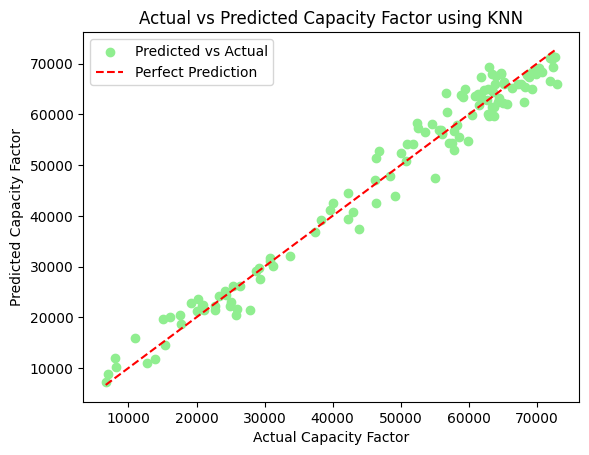

In [47]:
# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred, color='lightgreen', label='Predicted vs Actual')

# Line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Capacity Factor')
plt.ylabel('Predicted Capacity Factor')
plt.title('Actual vs Predicted Capacity Factor using KNN')
plt.legend()

plt.show()

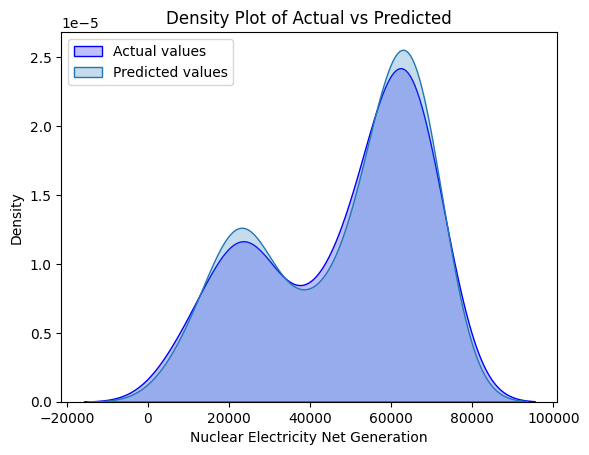

In [46]:
import seaborn as sns

sns.kdeplot(y_test.values.flatten(), label='Actual values', color='blue', fill=True)
sns.kdeplot(y_pred, label='Predicted values', color='red', fill=True)
plt.xlabel('Nuclear Electricity Net Generation')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted')
plt.legend()
plt.show()
